<a href="https://colab.research.google.com/github/skyworld19/ds-school-advanced/blob/master/WS_Salary_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Salary 데이타 분석

#### import 및 한글 폰트 등록

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from   pandas import Series, DataFrame
import numpy  as np

In [ ]:
#데이타가 많은경우 모두 출력 안되고 ... 으로 생략해서 출력됨.
pd.set_option('max_rows',500)    #출력할 max row를 지정
pd.set_option('max_columns',20)  #출력할 max columns를 지정
#출력 format 지정 
pd.set_option('display.float_format', '{:,.2f}'.format)

#### DataFrame 생성

read_csv(파일명, ....)  <br/>
encoding : 데이타의 문자 코드 형식(한글은 UTF-8,EUC-KR)<br/>
  cp949  : 윈도우에서 작성된 한글 <br/>
na_values: 결측치를 표현하는 문자를 NaN으로 변환<br/>
header     : 파일 데이타에 column을 사용할지 여부<br/>
skiprows  : skip하고 읽을 row 개수<br/>
names      : 컬럼명을 새로 부여<br/>

In [ ]:
# [1] salary.csv 파일을 읽어 df로 저장한다
# '-'를 NA Value 로 처리하기 위해 na_values='-' 를 사용한다
df = pd.read_csv('salary.csv', na_values='-')

# [2] df의 상위 5줄을 출력하여 본다
df.head()

,age,salary,specialSalary,workTime,numberOfWorker,career,gender
0,-19,1346534.0,151840.0,169.5,15042.0,Under 1Y,M
1,20-24,1584214.0,115375.0,180.1,74251.0,Under 1Y,M
2,25-29,1922043.0,268058.0,178.0,143338.0,Under 1Y,M
3,30-34,2130988.0,335710.0,180.8,103585.0,Under 1Y,M
4,35-39,2414345.0,352816.0,181.4,65385.0,Under 1Y,M


In [ ]:
# [3] df의 열에 대한 정보 Column 이름, Non-Null Count, Dtype 를 확인한다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             100 non-null    object 
 1   salary          98 non-null     float64
 2   specialSalary   97 non-null     float64
 3   workTime        98 non-null     float64
 4   numberOfWorker  98 non-null     float64
 5   career          100 non-null    object 
 6   gender          100 non-null    object 
dtypes: float64(4), object(3)
memory usage: 5.6+ KB


#### 결측치 데이터 확인 및 처리

In [ ]:
# [4] df의 결측치 데이터를 확인한다.


age               0
salary            2
specialSalary     3
workTime          2
numberOfWorker    2
career            0
gender            0
dtype: int64

In [ ]:
# [5] 결측 데이타중 salary의 NaN 값 정보를 확인한다 


,age,salary,specialSalary,workTime,numberOfWorker,career,gender
40,-19,nan,nan,nan,nan,Above 10Y,M
90,-19,nan,nan,nan,nan,Above 10Y,F


In [ ]:
# [6] 결측 데이타중 specialSalary의 NaN 값 정보를 확인한다 


,age,salary,specialSalary,workTime,numberOfWorker,career,gender
30,-19,"2,483,000.00",nan,226.00,12.00,Under 5~10Y,M
40,-19,nan,nan,nan,nan,Above 10Y,M
90,-19,nan,nan,nan,nan,Above 10Y,F


In [ ]:
# [7] specialSalary의 결측치에 대해 0으로 대체하는 결측치 처리를 한다.


# 결과 확인 - 표시 되지 않음 확인
df[df.specialSalary.isna()]

,age,salary,specialSalary,workTime,numberOfWorker,career,gender


In [ ]:
# [8] salary의 결측치는 삭제 ==> 급여 정보를 분석 중인데 salary가 없으면 분석할 수 없기 때문에 


# 결과 확인 - 표시 되지 않음 확인
df[df.salary.isna()]

,age,salary,specialSalary,workTime,numberOfWorker,career,gender


In [ ]:
# [9] df의 결측치 데이터가 제거 된 것을 확인한다


age               0
salary            0
specialSalary     0
workTime          0
numberOfWorker    0
career            0
gender            0
dtype: int64

#### 범주형 데이타 확인

In [ ]:
# [10] gender의 factor(Label) 및 빈도수 확인


F    49
M    49
Name: gender, dtype: int64

In [ ]:
# [11] age의 factor(Label) 및 빈도수 확인


50-54    10
35-39    10
30-34    10
45-49    10
40-44    10
60-      10
55-59    10
20-24    10
25-29    10
-19       8
Name: age, dtype: int64

In [ ]:
# [12] career의 factor(Label) 및 빈도수 확인


Under 1~3Y     20
Under 5~10Y    20
Under 1Y       20
Under 3~5Y     20
Above 10Y      18
Name: career, dtype: int64

#### 기술 통계 및 시각화

In [ ]:
# [13] df의 통계값을 확인한다


,salary,specialSalary,workTime,numberOfWorker
count,98.00,98.00,98.00,98.00
mean,"2,171,577.84","3,225,144.84",177.76,"88,611.67"
std,"640,129.61","3,109,727.69",11.35,"98,820.78"
min,"1,117,605.00",0.00,148.00,12.00
25%,"1,689,658.25","609,992.25",170.00,"32,572.00"
50%,"2,120,345.00","2,338,585.50",178.05,"60,157.50"
75%,"2,519,221.25","5,086,082.00",183.90,"100,778.75"
max,"4,064,286.00","13,252,036.00",226.00,"533,852.00"


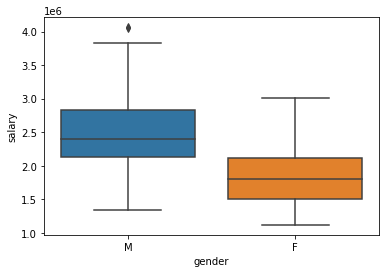

In [ ]:
# [14] 성별에 따른 급여 시각화 (boxplot)

plt.show()

In [ ]:
# [15] 성별별 급여 평균, 중앙값 구하기


,mean,median
gender,,
남,"2,477,332.39","2,396,300.00"
여,"1,865,823.29","1,809,095.00"


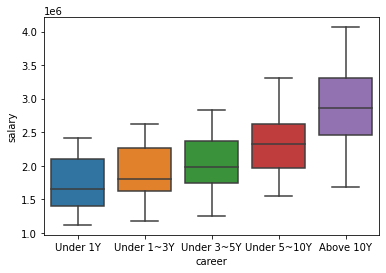

In [ ]:
# [16] 경력에 따른 급여 시각화 (boxplot)

plt.show()

In [ ]:
# [17] 경력별 급여 평균, 중앙값 구하기

careerMean

,mean,median
career,,
Under 1Y,"1,730,835.35","1,657,394.00"
Under 1~3Y,"1,905,011.90","1,803,340.00"
Under 3~5Y,"2,028,014.90","1,988,333.50"
Under 5~10Y,"2,360,462.50","2,317,689.50"
Above 10Y,"2,907,118.61","2,864,317.00"


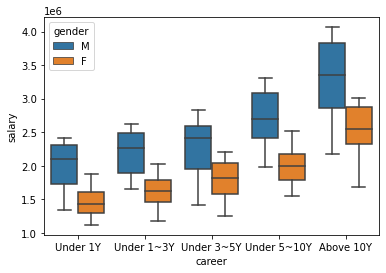

In [ ]:
# [18] 성별/경력에 따른 급여 시각화

plt.show()

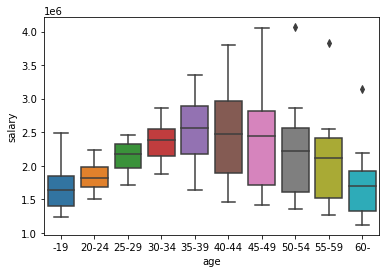

In [ ]:
# [19] 나이에 따른 급여 시각화 (boxplot)

plt.show()

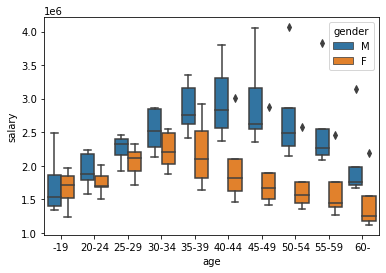

In [ ]:
# [20] 나이/성별에 따른 급여 시각화 (boxplot)

plt.show()

In [ ]:
# [21] 성별/나이에 따른 급여 평균


gender,F,M,TotalMean
age,,,
-19,"1,657,815.75","1,723,957.00","1,690,886.38"
20-24,"1,752,322.60","1,933,783.80","1,843,053.20"
25-29,"2,053,670.60","2,253,717.80","2,153,694.20"
30-34,"2,228,775.80","2,526,384.20","2,377,580.00"
35-39,"2,200,871.20","2,861,132.20","2,531,001.70"
40-44,"2,002,011.40","2,977,029.80","2,489,520.60"
45-49,"1,867,277.20","2,945,062.60","2,406,169.90"
50-54,"1,738,572.60","2,772,345.80","2,255,459.20"
55-59,"1,662,055.20","2,576,476.60","2,119,265.90"


In [ ]:
# [22] 연령별, 경력별 급여 평균 테이블 만들고, 열로 age별 급여 평균, 행으로 career별 급여 평균 넣기


career_age

career,1년미만,1~3년미만,3~5년미만,5~10년미만,10년이상,AgeMean
age,,,,,,
-19,"1,294,280.00","1,633,143.00","1,611,615.50","2,224,507.00",0.00,"1,690,886.38"
20-24,"1,542,985.50","1,747,777.00","1,864,955.50","2,128,307.00","1,931,241.00","1,843,053.20"
25-29,"1,818,687.00","2,044,431.00","2,219,363.00","2,298,241.00","2,387,749.00","2,153,694.20"
30-34,"2,006,125.00","2,148,617.50","2,360,558.00","2,669,352.00","2,703,247.50","2,377,580.00"
35-39,"2,029,140.50","2,216,684.00","2,430,147.00","2,836,625.50","3,142,411.50","2,531,001.70"
40-44,"1,916,416.00","2,095,779.00","2,323,138.50","2,707,617.00","3,404,652.50","2,489,520.60"
45-49,"1,880,915.00","2,025,434.00","2,141,486.00","2,522,258.00","3,460,756.50","2,406,169.90"
50-54,"1,750,962.50","1,871,338.00","2,027,139.50","2,308,103.50","3,319,752.50","2,255,459.20"
55-59,"1,674,613.50","1,823,711.00","1,799,049.00","2,148,320.00","3,150,636.00","2,119,265.90"


#### 범주형 데이터를 숫자로 변경 

In [ ]:
# [23] 모든 범주형 데이터를 one-hot-encoding 방식으로 숫자로 변경
df2 = 
print(df2.shape)
df2.head()

(98, 21)


,salary,specialSalary,workTime,numberOfWorker,age_-19,age_20-24,age_25-29,age_30-34,age_35-39,age_40-44,...,age_50-54,age_55-59,age_60-,career_Above 10Y,career_Under 1Y,career_Under 1~3Y,career_Under 3~5Y,career_Under 5~10Y,gender_F,gender_M
0,"1,346,534.00","151,840.00",169.50,"15,042.00",1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,"1,584,214.00","115,375.00",180.10,"74,251.00",0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,"1,922,043.00","268,058.00",178.00,"143,338.00",0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,"2,130,988.00","335,710.00",180.80,"103,585.00",0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,"2,414,345.00","352,816.00",181.40,"65,385.00",0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
# [24] df2의 상관계수를 확인


,salary,specialSalary,workTime,numberOfWorker,age_-19,age_20-24,age_25-29,age_30-34,age_35-39,age_40-44,...,age_50-54,age_55-59,age_60-,career_Above 10Y,career_Under 1Y,career_Under 1~3Y,career_Under 3~5Y,career_Under 5~10Y,gender_F,gender_M
salary,1.00,0.78,0.23,0.69,-0.23,-0.17,-0.01,0.11,0.19,0.17,...,0.04,-0.03,-0.22,0.55,-0.35,-0.21,-0.11,0.15,-0.48,0.48
specialSalary,0.78,1.00,0.05,0.66,-0.06,0.02,0.10,0.11,0.09,0.05,...,-0.02,-0.08,-0.23,0.54,-0.50,-0.19,-0.06,0.22,-0.16,0.16
workTime,0.23,0.05,1.00,-0.12,0.21,0.18,-0.07,-0.15,-0.13,-0.04,...,0.06,0.01,-0.11,-0.03,-0.26,0.02,0.07,0.20,-0.63,0.63
numberOfWorker,0.69,0.66,-0.12,1.00,-0.25,-0.16,0.08,0.20,0.13,0.15,...,0.02,-0.11,-0.14,0.35,-0.18,0.02,-0.16,-0.02,-0.28,0.28
age_-19,-0.23,-0.06,0.21,-0.25,1.00,-0.10,-0.10,-0.10,-0.10,-0.10,...,-0.10,-0.10,-0.10,-0.14,0.03,0.03,0.03,0.03,0.00,-0.00
age_20-24,-0.17,0.02,0.18,-0.16,-0.10,1.00,-0.11,-0.11,-0.11,-0.11,...,-0.11,-0.11,-0.11,0.01,-0.00,-0.00,-0.00,-0.00,0.00,0.00
age_25-29,-0.01,0.10,-0.07,0.08,-0.10,-0.11,1.00,-0.11,-0.11,-0.11,...,-0.11,-0.11,-0.11,0.01,-0.00,-0.00,-0.00,-0.00,0.00,0.00
age_30-34,0.11,0.11,-0.15,0.20,-0.10,-0.11,-0.11,1.00,-0.11,-0.11,...,-0.11,-0.11,-0.11,0.01,-0.00,-0.00,-0.00,-0.00,0.00,0.00
age_35-39,0.19,0.09,-0.13,0.13,-0.10,-0.11,-0.11,-0.11,1.00,-0.11,...,-0.11,-0.11,-0.11,0.01,-0.00,-0.00,-0.00,-0.00,0.00,0.00
age_40-44,0.17,0.05,-0.04,0.15,-0.10,-0.11,-0.11,-0.11,-0.11,1.00,...,-0.11,-0.11,-0.11,0.01,-0.00,-0.00,-0.00,-0.00,0.00,0.00


In [ ]:
# LabelEncoding 방식 소개

### LabelEncoding 사용

In [ ]:
df3 = df.copy()
df3.head(3)

,age,salary,specialSalary,workTime,numberOfWorker,career,gender
0,-19,"1,346,534.00","151,840.00",169.50,"15,042.00",Under 1Y,M
1,20-24,"1,584,214.00","115,375.00",180.10,"74,251.00",Under 1Y,M
2,25-29,"1,922,043.00","268,058.00",178.00,"143,338.00",Under 1Y,M


In [ ]:
# age를 숫자 데이타로 변경
df3['ageL'] = df3.age.astype('category').cat.codes
df3.head(3)

,age,salary,specialSalary,workTime,numberOfWorker,career,gender,ageL
0,-19,"1,346,534.00","151,840.00",169.50,"15,042.00",Under 1Y,M,0
1,20-24,"1,584,214.00","115,375.00",180.10,"74,251.00",Under 1Y,M,1
2,25-29,"1,922,043.00","268,058.00",178.00,"143,338.00",Under 1Y,M,2


In [ ]:
# career을 숫자 데이타로 변경
df3['careerL'] = df3.career.astype('category').cat.codes
df3.head(3)

,age,salary,specialSalary,workTime,numberOfWorker,career,gender,ageL,careerL
0,-19,"1,346,534.00","151,840.00",169.50,"15,042.00",Under 1Y,M,0,1
1,20-24,"1,584,214.00","115,375.00",180.10,"74,251.00",Under 1Y,M,1,1
2,25-29,"1,922,043.00","268,058.00",178.00,"143,338.00",Under 1Y,M,2,1


In [ ]:
# gender를 숫자 데이터로 변경
df3['genderL'] = df3.gender.astype('category').cat.codes
df3.head(3)

,age,salary,specialSalary,workTime,numberOfWorker,career,gender,ageL,careerL,genderL
0,-19,"1,346,534.00","151,840.00",169.50,"15,042.00",Under 1Y,M,0,1,1
1,20-24,"1,584,214.00","115,375.00",180.10,"74,251.00",Under 1Y,M,1,1,1
2,25-29,"1,922,043.00","268,058.00",178.00,"143,338.00",Under 1Y,M,2,1,1


In [ ]:
df3 = df3[['salary', 'specialSalary', 'workTime', 'numberOfWorker', 'ageL', 'careerL', 'genderL']]
df3.head(3)

,salary,specialSalary,workTime,numberOfWorker,ageL,careerL,genderL
0,"1,346,534.00","151,840.00",169.50,"15,042.00",0,1,1
1,"1,584,214.00","115,375.00",180.10,"74,251.00",1,1,1
2,"1,922,043.00","268,058.00",178.00,"143,338.00",2,1,1


### Machine Learning

In [ ]:
# 회귀 분석에 필요한 라이브러리 import
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# [25] 데이터셋을 X, y로 분리하고 스케일링을 한다
# df2로 실행하여 보고, df3로 수정하여 실행해 보세요.
X = # df2의 첫 번째 열을 제외한 모든 열
y = # df2의 첫 번째 열
X_scaled = # StandardScaler를 사용한 스케일링

# 스케일이 되었는지 확인하는 코드
X_scaled[:1]

array([[-1.29549661, -0.99336865, -0.73189472, -0.74830343,  3.35410197,
        -0.33709993, -0.33709993, -0.33709993, -0.33709993, -0.33709993,
        -0.33709993, -0.33709993, -0.33709993, -0.33709993, -0.47434165,
         1.97484177, -0.50636968, -0.50636968, -0.50636968, -1.        ]])

In [ ]:
# [26] train_test_split을 사용하여 적절하게 train, test에 대한 작업을 한다
# random_state=0을 사용하며 train_size을 0.7~ 0.8 범위로 임의지정함
X_train, X_test, y_train, y_test = # train, test 분할 작업
[x.shape for x in [X_train, X_test, y_train, y_test]]

In [ ]:
# [27] LinearRegression 회귀 분석 및 성능평가
model_lr = # LinearRegression 모델 정의 및 학습
pred = # 모델을 사용하여 X_test에 대한 예측값 구하기
mse = mean_squared_error(y_test, pred)
rmse = mse ** 2
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'train r2 {model_lr.score(X_test, y_test)}')
print(f'test mse:{mse:.3f}, rmse:{rmse:.3f},  mae:{mae:.3f}, r2:{r2:.3f}')

In [ ]:
# [28] SGDRegressor 회귀 분석 및 성능평가
model_sgd = # SGDRegressor 모델 정의 및 학습
pred = # 모델을 사용하여 X_test에 대한 예측값 구하기
mse = mean_squared_error(y_test, pred)
rmse = mse ** 2
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'train r2 {model_sgd.score(X_test, y_test)}')
print(f'test mse:{mse:.3f}, rmse:{rmse:.3f},  mae:{mae:.3f}, r2:{r2:.3f}')

In [ ]:
# [29] 다항 회귀 분석 및 성능평가 - PolynomialFeatures, Lasso

pe = # PolynomialFeatures 객체 생성 degree=2, include_bias=False 사용
X_poly = # pe를 사용하여 X_scaled를 변환
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
model_lasso = # Lasso 모델 정의 및 학습 (alpha 값은 임의 지정- 좋은 값을 찾을 것)
pred = model_lasso.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = mse ** 2
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'train r2 {model_lasso.score(X_test, y_test)}')
print(f'test mse:{mse:.3f}, rmse:{rmse:.3f},  mae:{mae:.3f}, r2:{r2:.3f}')

In [ ]:
#[30] shelve 파일에 model을 저장하여 보세요
import shelve
with shelve.open('./data/DBGroupData') as data:
    data['salary_model_lr'] = model_lr
    data['salary_model_lasso'] = model_lasso

In [ ]:
# 앙상블 모델 (Regressor) - 학습전의 내용이라 넣어 두었습니다.
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=0)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = mse ** 2
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'train r2 {rf.score(X_test, y_test)}')
print(f'test mse:{mse:.3f}, rmse:{rmse:.3f},  mae:{mae:.3f}, r2:{r2:.3f}')